In [1]:
import pandas as pd
import sys
import os.path
import pickle
import time
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# Load
Read the file resulting from the scraping:

In [2]:
# Location of the dataframe pickle file containing all the boat data:
boats_df_path = './data/boats_df.pkl'
if os.path.isfile(boats_df_path):
    df = pd.read_pickle(boats_df_path)
    print(len(df),' boats read from file into boats_df.')

3001  boats read from file into boats_df.


In [ ]:
df.head()

I'm going to rename the feature 'year' to 'year_str'

In [3]:
df.rename(columns={'year':'year_str'},inplace=True)
df.rename(columns={'price':'price_str'},inplace=True)

# Clean
Clean steps to prepare the data for modeling:

In [4]:
# There are no null values in the year so it simply be converted to an int:
df['year'] = df['year_str'].astype(int).copy()
df['price'] = pd.to_numeric(df['price_str'],errors='coerce').copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3001 entries, 5637501 to 1015053
Data columns (total 17 columns):
price_str          3001 non-null object
make               3001 non-null object
model              2948 non-null object
year_str           3001 non-null object
cls                3001 non-null object
length_ft          3001 non-null object
LOA_ft             2709 non-null object
displacement_lb    1466 non-null object
fuel_type          2893 non-null object
power_hp           2086 non-null object
eng_make           2170 non-null object
eng_model          1587 non-null object
eng_year           1369 non-null object
eng_hrs            1118 non-null object
location           3001 non-null object
year               3001 non-null int64
price              757 non-null float64
dtypes: float64(1), int64(1), object(15)
memory usage: 422.0+ KB


Grab the parts of df that will be modeled and eliminate rows that have None's.

In [6]:
data = df.loc[:,['year','price']].copy()
data.dropna(inplace=True)
X = data[['year']]
y = data['price']

In [7]:
# Divide the data into test and train sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [8]:
# Create an empty model
lr = LinearRegression()

# Fit the model to the full dataset
fit = lr.fit(pd.DataFrame(X_train), y_train)

# Calculate R2 for the training set
y_pred_train = fit.predict(pd.DataFrame(X_train))
r2_train = fit.score(pd.DataFrame(X_train),y_train)

# Calculate y_pred and R2 for the test set
y_pred = fit.predict(pd.DataFrame(X_test))
r2_test = fit.score(pd.DataFrame(X_test),y_test)

In [9]:
r2_train = fit.score(pd.DataFrame(X_train),y_train)
y_pred_test = fit.predict(X_test)
y_pred_train = fit.predict(X_train)
r2_test = fit.score(X_test,y_test)

R2 Train:  0.26327696575500614
R2 Test:  0.4262073052412111


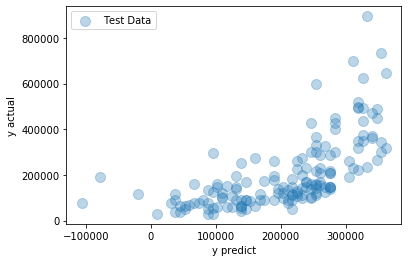

In [11]:
#Plot the results
fig,ax = plt.subplots(1,1);
ax.scatter(y_pred_test,y_test,label='Test Data', s=100, alpha=0.3)
#ax.scatter(y_pred_train,y_train,label='Train Data', s=100, alpha=0.2)
ax.set_ylabel('y actual')
ax.set_xlabel('y predict')
ax.legend();
print('R2 Train: ', r2_train)
print('R2 Test: ', r2_test)

This was the MVP linear regression.